In [104]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reality check 1: 100 years of no herbivory

# Reality check 2: Consumer spatial hotspots

# Reality check 3: Low primary producer numbers (spatial)

# Forecasting

In [105]:
final_df =  pd.read_csv("forecasting_experiment.csv").drop(columns="Unnamed: 0")
# rename cols
final_df = final_df.rename(columns={'ninetyfivePerc': 'onehundperc', 'fivePerc': 'zeroperc'})

In [106]:
# now show more quantiles, 95th
perc3 = final_df.groupby(['Time', 'Ecosystem Element'])['Abundance %'].quantile(0.975) 
perc3.name = 'ninetyfiveperc'
final_df = final_df.join(perc3, on=['Time', 'Ecosystem Element'])
perc4 = final_df.groupby(['Time', 'Ecosystem Element'])['Abundance %'].quantile(0.025)
perc4.name = "fiveperc"
final_df = final_df.join(perc4, on=['Time', 'Ecosystem Element'])
# and 80th
perc5 = final_df.groupby(['Time', 'Ecosystem Element'])['Abundance %'].quantile(0.9)
perc5.name = 'eightyperc'
final_df = final_df.join(perc5, on=['Time', 'Ecosystem Element'])
perc6 = final_df.groupby(['Time', 'Ecosystem Element'])['Abundance %'].quantile(0.1)
perc6.name = "twentyperc"

final_df = final_df.join(perc6, on=['Time', 'Ecosystem Element'])

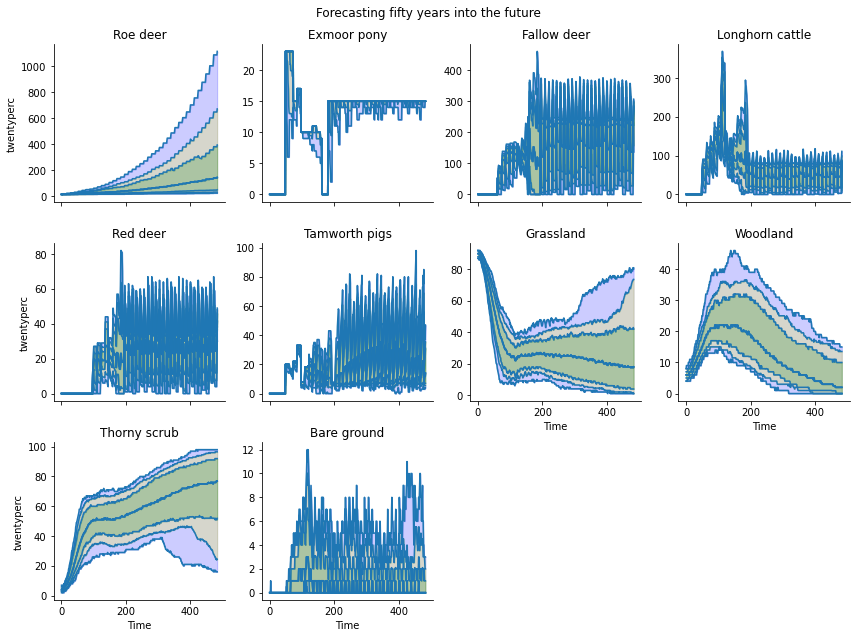

In [107]:
palette=['blue', 'yellow', 'green']
f = sns.FacetGrid(final_df, col="Ecosystem Element", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'onehundperc')
f.map(sns.lineplot, 'Time', 'zeroperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'ninetyfiveperc')
f.map(sns.lineplot, 'Time', 'fiveperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'eightyperc')
f.map(sns.lineplot, 'Time', 'twentyperc')

for ax in f.axes.flat:
    ax.fill_between(ax.lines[1].get_xdata(),ax.lines[1].get_ydata(), ax.lines[2].get_ydata(),  color="blue",alpha =0.2)
    # 95 perc
    ax.fill_between(ax.lines[4].get_xdata(),ax.lines[4].get_ydata(), ax.lines[5].get_ydata(),  color="yellow",alpha =0.2)
    # 80 perc
    ax.fill_between(ax.lines[7].get_xdata(),ax.lines[7].get_ydata(), ax.lines[8].get_ydata(),  color="green",alpha =0.2)

# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")

f.fig.suptitle('Forecasting fifty years into the future')
plt.tight_layout()
plt.show()

# Risk assessment

In [108]:
# percent risk of woodland collapsing to < 5%
last_year_woodland = final_df.loc[(final_df['Time'] == 483) & (final_df['Ecosystem Element'] == "Woodland")]
woodland_loss = last_year_woodland.loc[(last_year_woodland['Abundance %'] <= 5)]
len(woodland_loss)

78

In [109]:
# percent risk of scrub collapsing to < 5%
last_year_scrub = final_df.loc[(final_df['Time'] == 483) & (final_df['Ecosystem Element'] == "Thorny Scrub")]
scrub_loss = last_year_scrub.loc[(last_year_scrub['Abundance %'] <= 5)]
len(scrub_loss)

0

In [111]:
# percent risk of grass collapsing to < 5%
last_year_grass = final_df.loc[(final_df['Time'] == 483) & (final_df['Ecosystem Element'] == "Grassland")]
grass_loss = last_year_grass.loc[(last_year_grass['Abundance %'] <= 5)]
len(grass_loss)

14

In [112]:
# proportion of outcomes where non-reintroduced (e.g., non-controlled) species increased/decreased from 2020
non_controlled_species = [ "Grassland", "Roe deer", "Thorny Scrub", "Woodland"]
# filter df to that
initial_condit = final_df.loc[(final_df['Time'] == 184) & (final_df['Ecosystem Element'].isin(non_controlled_species))].rename(columns={'Abundance %': 'Abundance'})
final_condit = final_df.loc[(final_df['Time'] == 483) & (final_df['Ecosystem Element'].isin(non_controlled_species))].rename(columns={'Abundance %': 'Abundance'})
# concat them and get difference
diff = (final_condit.set_index(['runNumber', 'Ecosystem Element']).Abundance-initial_condit.set_index(['runNumber', 'Ecosystem Element']).Abundance).reset_index()
# set if node increased
diff["Abundance"] = pd.Series(np.where(diff.Abundance.values >= 0, "Increase", "Decrease"), diff.index)
# graph it
final_increase = diff.groupby("Ecosystem Element").apply(lambda x: x[x.Abundance.str.contains('Increase')].count())
final_decrease = diff.groupby("Ecosystem Element").apply(lambda x: x[x.Abundance.str.contains('Decrease')].count())

In [118]:
final_df = pd.DataFrame()
final_df["Ecosystem Element"] = non_controlled_species
final_df["Increase"] =final_increase.Abundance.values
final_df["Decrease"] = final_decrease.Abundance.values
final_df = final_df.set_index(["Ecosystem Element"])
final_df

,Increase,Decrease
Ecosystem Element,,
Grassland,22,78
Roe deer,100,0
Thorny Scrub,90,10
Woodland,0,100


<AxesSubplot:xlabel='Ecosystem Element'>

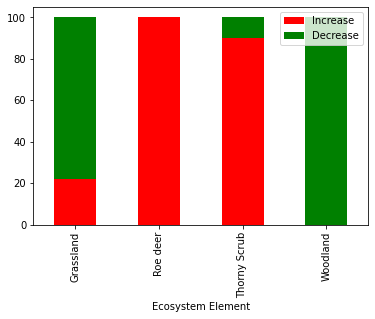

In [119]:
final_df.plot(kind='bar', stacked=True, color=['red', 'green'])
